In [1]:
%pip install tensorflow  opencv-python matplotlib filetype

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip list

Package                   Version
------------------------- --------------
absl-py                   2.3.1
anyio                     4.10.0
argon2-cffi               25.1.0
argon2-cffi-bindings      25.1.0
arrow                     1.3.0
asttokens                 3.0.0
astunparse                1.6.3
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.13.4
bleach                    6.2.0
certifi                   2025.8.3
cffi                      1.17.1
challanges                1.0.0
charset-normalizer        3.4.3
colorama                  0.4.6
comm                      0.2.3
contourpy                 1.3.3
cycler                    0.12.1
debugpy                   1.8.16
decorator                 5.2.1
defusedxml                0.7.1
executing                 2.2.0
fastjsonschema            2.21.2
filetype                  1.2.0
flatbuffers               25.2.10
fonttools                 4.59.2
fqdn         

In [3]:
import tensorflow as tf
import os

In [4]:
gpus = tf.config.list_physical_devices('GPU')
print(gpus)

[]


In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
import cv2 
import filetype



In [7]:
data_dir = 'data'

In [8]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [9]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)): 
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = filetype.guess(image_path)
            if tip is None or tip.extension not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('issue with image {}'.format(image_path))

Image not in ext list data\cartheyia\61d9f5494752a40fa4fc96590174396e.webp


In [10]:
import numpy as np 
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 290 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

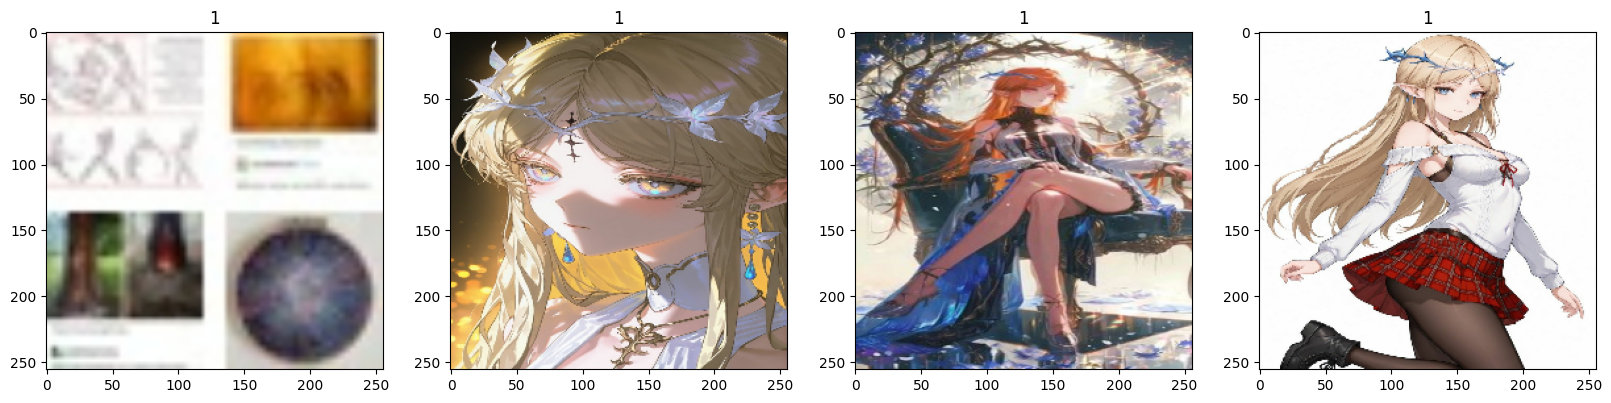

In [14]:
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]): 
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [15]:
data = data.map(lambda x, y: (x / 255, y))

In [16]:
data.as_numpy_iterator().next()

(array([[[[9.92156863e-01, 1.00000000e+00, 9.96078432e-01],
          [9.92156863e-01, 1.00000000e+00, 9.96078432e-01],
          [9.92156863e-01, 1.00000000e+00, 9.96078432e-01],
          ...,
          [9.92156863e-01, 1.00000000e+00, 9.96078432e-01],
          [9.92156863e-01, 1.00000000e+00, 9.96078432e-01],
          [9.92156863e-01, 1.00000000e+00, 9.96078432e-01]],
 
         [[9.92156863e-01, 1.00000000e+00, 9.96078432e-01],
          [9.92156863e-01, 1.00000000e+00, 9.96078432e-01],
          [9.92156863e-01, 1.00000000e+00, 9.96078432e-01],
          ...,
          [9.92156863e-01, 1.00000000e+00, 9.96078432e-01],
          [9.92156863e-01, 1.00000000e+00, 9.96078432e-01],
          [9.92156863e-01, 1.00000000e+00, 9.96078432e-01]],
 
         [[9.92156863e-01, 1.00000000e+00, 9.96078432e-01],
          [9.92156863e-01, 1.00000000e+00, 9.96078432e-01],
          [9.92156863e-01, 1.00000000e+00, 9.96078432e-01],
          ...,
          [9.92156863e-01, 1.00000000e+00, 9.9607

In [17]:
train_size = int(len(data) * .7)
val_size = int(len(data) * .2)
test_size = int(len(data) * .1)

In [18]:
train_size

7

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(16, (3,3) , 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3) , 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3) , 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

e:\programs\py\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
logdir='logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train, epochs=20, validation_data= val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 264ms/step - accuracy: 0.6562 - loss: 0.6231 - val_accuracy: 0.7812 - val_loss: 0.4888
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 274ms/step - accuracy: 0.6964 - loss: 0.5993 - val_accuracy: 0.7344 - val_loss: 0.5242
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - accuracy: 0.7321 - loss: 0.5145 - val_accuracy: 0.8906 - val_loss: 0.4625
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 235ms/step - accuracy: 0.8170 - loss: 0.3947 - val_accuracy: 0.9375 - val_loss: 0.2806
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 249ms/step - accuracy: 0.8348 - loss: 0.3591 - val_accuracy: 0.7969 - val_loss: 0.3802
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 250ms/step - accuracy: 0.8884 - loss: 0.3092 - val_accuracy: 0.8906 - val_loss: 0.3357
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 246ms/step - accuracy: 0.9241 - loss: 0.2472 - val_accuracy: 0.9531 - val_loss: 0.1803
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step - accuracy: 0.9241 - loss: 0.2013 - val_accuracy: 0.9062 - val_loss:

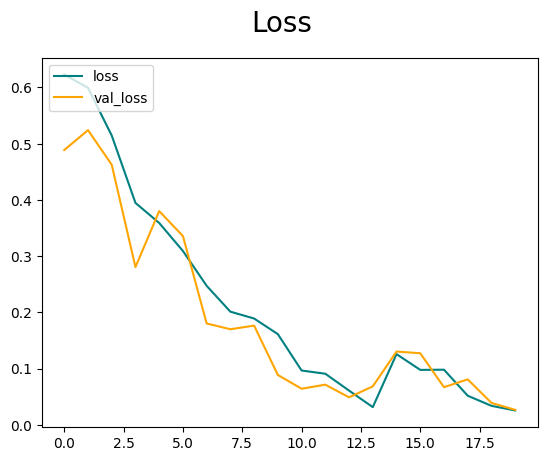

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

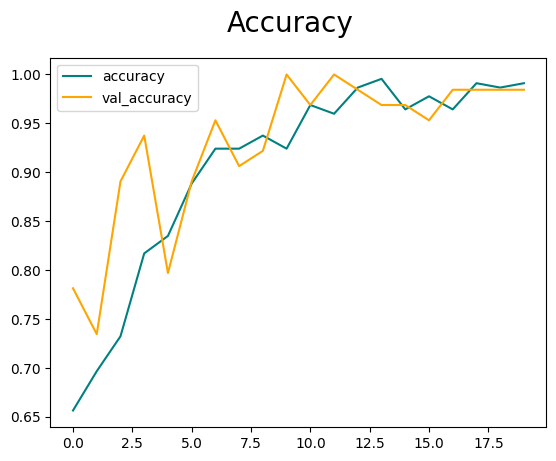

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [30]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [31]:
pre = Precision()
re = Recall() 
acc = BinaryAccuracy() 

In [32]:
for batch in test.as_numpy_iterator(): 
    X, y  = batch 
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


In [33]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [34]:
import cv2

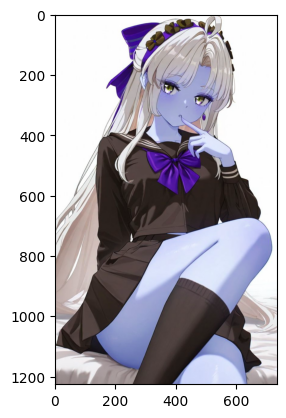

In [35]:
img = cv2.imread('happy.jpg')
plt.imshow(img)
plt.show()

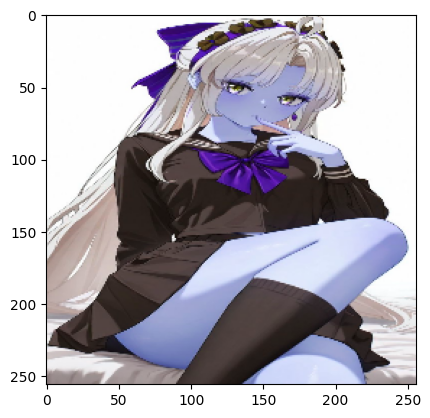

In [36]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [37]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [38]:
yhat

array([[0.9995234]], dtype=float32)

In [39]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [40]:
from tensorflow.keras.models import load_model

In [41]:
model.save(os.path.join('model', 'imageclassifier.h5'))

In [42]:
new_model = load_model('model/imageclassifier.h5')

In [43]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[0.9995234]], dtype=float32)